In [765]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler



In [766]:
df_raw = pd.read_csv("/Users/ma-66/Desktop/p1/Old car price prediction-ml/data/raw/used_cars .csv")
df = df_raw.copy()
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [767]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [769]:
# Clean Numeric columns (Milage and Price)
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(int)
df['price']= df['price'].str.replace('$','').str.replace(',', '').astype(int)



In [770]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [771]:
#  Create Hp Column
df['hp'] = df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float, errors='ignore')

# Create engine displacement
df['engine displacement'] = df['engine'].str.extract(r'(\d+\.\d+)\s*L')
df['engine displacement'] = df['engine displacement'].fillna(df['engine'].str.extract(r'(\d+\.\d+)\s*LITER')[0])
df['engine displacement'] = df['engine displacement'].astype(float, errors='ignore')

#  type v
df['is_v_engine']=df['engine'].str.contains(r'V\d+', case=False, na=False)

#  turbo type
df['turbo']= df['engine'].str.contains('TWIN TURBO', case=False, na=False)

# Dohc type

df['dohc'] = df['engine'].str.contains('DOHC', case=False, na=False)

In [772]:
#  cleaning fuel type
df["fuel_type"].value_counts()


fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [773]:
df['fuel_type']= df["fuel_type"].str.upper().replace({'PLUG-IN HYBRID': 'HYBRID','NOT SUPPORTED':'OTHER','-':'OTHER'})

In [774]:
#  cleaning transmission features
def classify_transmission(transmission):
  if 'M/T' in transmission or 'MT' in transmission or 'MANUAL' in transmission:
      return 'M/T'
  elif 'A/T' in transmission or 'AT' in transmission or "AUTOMAATIC" in transmission:
     return 'A/T'
  else :
    return 'OTHER'
df['transmission']= df['transmission'].apply(classify_transmission)

In [775]:
# Handlining Missing Values
df.isnull().sum()


brand                    0
model                    0
model_year               0
milage                   0
fuel_type              170
engine                   0
transmission             0
ext_col                  0
int_col                  0
accident               113
clean_title            596
price                    0
hp                     810
engine displacement    236
is_v_engine              0
turbo                    0
dohc                     0
dtype: int64

In [776]:
df['hp'] = df.groupby('brand')['hp'].transform(lambda x: x.fillna(x.mean()))

In [777]:
df['hp'].isnull().sum()

np.int64(2)

In [778]:
df[df['hp'].isnull()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,engine displacement,is_v_engine,turbo,dohc
229,Bugatti,Veyron 16.4 Grand Sport,2011,6330,GASOLINE,8.0L W16 64V GDI DOHC Twin Turbo,OTHER,White,White,None reported,Yes,1950995,NaN,8.0,False,True,True
236,Polestar,2 Launch Edition,2021,12172,NaN,Electric,OTHER,Thunder Gray,Charcoal,None reported,NaN,35999,NaN,NaN,False,False,False


In [779]:
df.dropna(subset=['hp'], inplace=True)

In [780]:
#  fuel type missing value handling
most_common_fuel = df.groupby('brand')['fuel_type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
df['fuel_type'] = df.apply(lambda row: most_common_fuel[row['brand']] if pd.isnull(row['fuel_type']) else row['fuel_type'], axis=1)

df['fuel_type'] = df['fuel_type'].fillna('OTHER')


In [781]:
df.isnull().sum()

brand                    0
model                    0
model_year               0
milage                   0
fuel_type                0
engine                   0
transmission             0
ext_col                  0
int_col                  0
accident               113
clean_title            595
price                    0
hp                       0
engine displacement    235
is_v_engine              0
turbo                    0
dohc                     0
dtype: int64

In [782]:
#  Engine displacements null values handling
most_common_displacement = df.groupby('brand')['engine displacement'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

df['engine displacement'] = df.apply(
    lambda row: most_common_displacement[row['brand']] if pd.isna(row['engine displacement']) else row['engine displacement'],
    axis=1
)

df['engine displacement'] = df['engine displacement'].fillna(df['engine displacement'].median())


In [783]:
df['engine displacement'].isnull().sum()
    

np.int64(0)

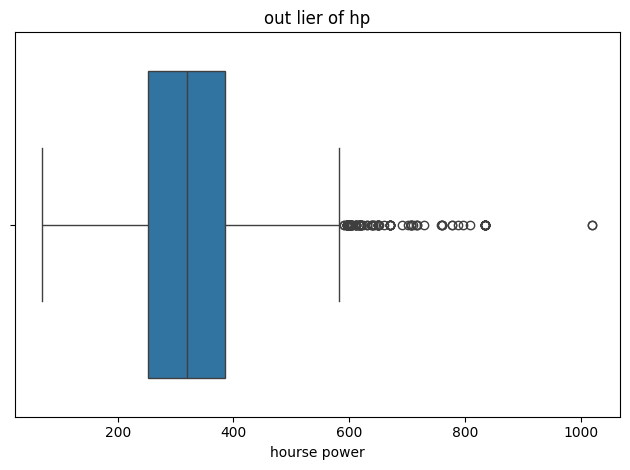

In [784]:
# Handling Outliers

sns.boxplot(x=df['hp'])
plt.title("out lier of hp")
plt.xlabel("hourse power")
plt.tight_layout()
plt.show()


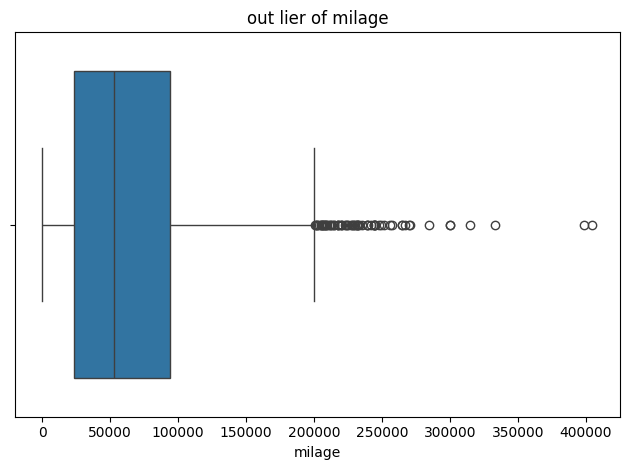

In [785]:
sns.boxplot(x=df['milage'])
plt.title("out lier of milage")
plt.xlabel("milage")
plt.tight_layout()
plt.show()

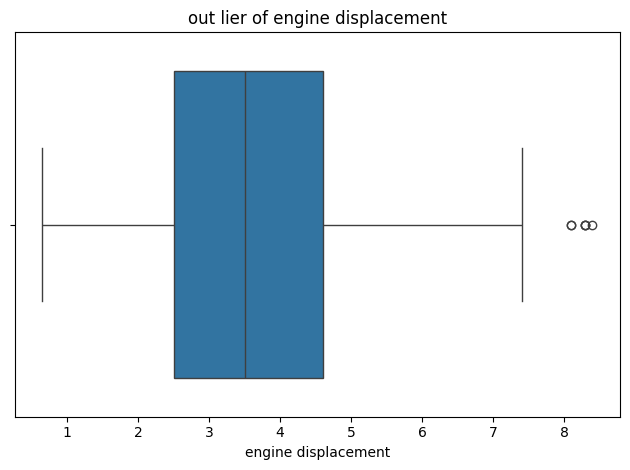

In [786]:
sns.boxplot(x=df['engine displacement'])
plt.title("out lier of engine displacement")
plt.xlabel("engine displacement")
plt.tight_layout()
plt.show()

In [787]:
# Remove outliers of engine displacement
Q1 = df['engine displacement'].quantile(0.25)  
Q3 = df['engine displacement'].quantile(0.75)   
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['engine displacement'] >= lower_bound) & (df['engine displacement'] <= upper_bound)]

In [788]:
# Remove outliers of price
Q1 = df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75)   
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [789]:
# Remove outlier of milage
Q1 = df['milage'].quantile(0.25)  
Q3 = df['milage'].quantile(0.75)   
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['milage'] >= lower_bound) & (df['milage'] <= upper_bound)]

In [790]:
Q1 = df['hp'].quantile(0.25)  
Q3 = df['hp'].quantile(0.75)   
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['hp'] >= lower_bound) & (df['hp'] <= upper_bound)]

In [791]:
#  Encoding Categorical Features
df['Accident_Impact'] = df['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)
categorical_columns = ['brand', 'fuel_type', 'transmission', 'is_v_engine', 'turbo', 'dohc']

for cat_col in categorical_columns:
    encoder = LabelEncoder()
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [792]:
#  Feature engineering

CURRENT_YEAR = datetime.now().year
df['Vehicle_Age'] = (CURRENT_YEAR - df["model_year"])-1

df['Mileage_per_Year'] = df.apply(
    lambda row: row['milage'] / row['Vehicle_Age'] if row['Vehicle_Age'] > 0 else row['milage'],
    axis=1
)

In [793]:
# Drop unused columns
df.drop(['brand','model', 'model_year', 'engine', 'milage', 'int_col', 'ext_col', 'accident'], axis = 1, inplace = True)

In [794]:
X = df.drop(columns=['price'])
y = df['price']

In [795]:
from sklearn.model_selection import train_test_split

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)





In [796]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, y_train.shape)

(2898, 11) (2898,)


In [797]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [798]:
lr=LinearRegression()

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

svr = SVR( kernel='rbf',
    C=100,
    gamma='scale')

xgb = XGBRegressor(
    n_estimators=2000,
    max_depth=10,
    learning_rate=0.02,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_weight=5,
    gamma=0.1,
    reg_alpha=0.2,
    reg_lambda=2.0,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)




In [799]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)




In [800]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2  :", r2_score(y_test, y_pred))

In [801]:
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVR", y_test, svr_pred)
evaluate_model("XGBoost RF", y_test, xgb_pred)


Linear Regression
MAE : 0.2791226374293494
RMSE: 0.36934483141629504
R2  : 0.7210505529303924

Random Forest
MAE : 0.21630822366013655
RMSE: 0.2909122588785138
R2  : 0.826944463457458

SVR
MAE : 0.23329960882419543
RMSE: 0.3119352931724039
R2  : 0.8010286793397827

XGBoost RF
MAE : 0.20603844050095294
RMSE: 0.2806790581389212
R2  : 0.8389052177668976


In [802]:
# Save the cleaned dataframe as pickle
df.to_pickle("/Users/ma-66/Desktop/p1/Old car price prediction-ml/data/processed/cleaned_cars.pkl")

In [809]:
df.head(10)

,fuel_type,transmission,clean_title,price,hp,engine displacement,is_v_engine,turbo,dohc,Accident_Impact,Vehicle_Age,Mileage_per_Year
0,1,0,1,10300,300.000000,3.7,1,0,0,1,12,4250.000000
1,2,2,1,38005,246.700000,3.8,1,0,1,1,4,8685.500000
2,2,2,0,54598,303.659259,3.5,0,0,1,0,3,7457.333333
3,3,0,1,15500,354.000000,3.5,1,0,0,0,10,8890.000000
4,2,2,0,34999,318.831250,2.0,0,0,1,0,4,2458.750000
5,2,2,0,14798,256.595238,2.4,0,0,0,0,9,15155.222222
6,2,0,1,31000,292.000000,2.0,0,0,0,0,8,10500.000000
8,2,0,1,41927,311.000000,3.5,1,0,0,0,4,5859.000000
9,4,0,1,69950,534.000000,3.5,0,0,0,0,5,6800.000000
10,2,2,0,73897,381.039216,3.0,1,0,0,0,4,6902.000000
